# Sample calculations with stokes-numerics

Note: This notebook needs to be able to import modules from the stokes-numerics repository.  If the notebook file is moved to a location other than the root directory of the repository, it will be necessary to adjust `sys.path` so that the imports can find stokes-numerics modules.

# Setup

First we set up logging.

In [1]:
import logging
import logconfig
logconfig.logconfig(filename=None)
logconfig.loglevel(logging.WARN)

Next we import the main modules.

In [2]:
import integralequations
import framedata
import comparisons
import hkmetric

# Some quick IEQ computations

Turn on more verbose output in this section for reassurance, since some of the commands take a little while to run.

In [3]:
logconfig.loglevel(logging.INFO)

Compute the X-functions in the (A1,A2) example, for the Hitchin section, at R=1.

In [4]:
xar = integralequations.computeXar("A1A2", R = 1)

[06-29 13:08] [MainProcess] [integralequations] [INFO] Starting to compute xars for theory A1A2, R = 1.000E+00, tolerance = 2.000E-15, steps = 131072, maxiter = 1000, L = 200, damping = 0.3
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 1, maxdelta = 6.928E-04 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 2, maxdelta = 2.074E-04 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 3, maxdelta = 6.208E-05 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 4, maxdelta = 1.858E-05 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 5, maxdelta = 5.563E-06 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 6, maxdelta = 1.665E-06 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 7, maxdelta = 4.985E-07 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 8, maxdelta = 1.492E-07 (0

Use the X-functions to get the spectral coordinates X1 and X2, at zeta=1.

In [5]:
xar.computeX(charge = [1,0], zeta=1)

(-0.006415703123337184-1.715955260471928e-21j)

In [6]:
xar.computeX(charge = [0,1], zeta=1)

(-1+5.349240186923233e-19j)

Compute the X-functions at other values of zeta.

In [7]:
xar.computeX(charge = [1,0], zeta = 3 + 5j)

(0.5280180249625884-0.5257032452456382j)

Compute the cluster: this is a packaging of the spectral coordinates at zeta=e^(i theta), convenient for comparing with the PDE results.

In [8]:
xar.getCluster(theta = 0)

[-0.006415703123337184, -1.0]

A tricky point is that `getCluster()` is trying to compute some specific determinantal invariants, and this requires that it should return different combinations of spectral coordinates depending on the value of theta. The particular combinations of spectral coordinates which we compute are specified in the `theorydata` module. If we pick a `theta` too far from zero, then `getCluster()` usually doesn't know what combination of spectral coordinates it should compute; in that case it will return an error.

In the (A1,A2) example we have 6 nonzero BPS invariants and correspondingly 6 distinguished rays in the zeta-plane, along which the integrals in the IEQ method run.

In [9]:
xar.theory.activerays

In [10]:
xar.theory.activerays[0].phase

(0.8660254037844386-0.5j)

In [11]:
xar.theory.activerays[0].id

0

The code stores information about X-functions on only 3 of these rays, since the other 3 are related by a symmetry.

In [12]:
xar.theory.rayequivclasses

[[0, 1], [2, 3], [4, 5]]

Each of these 3 rays has a list of charges, which contains just 1 element, namely the charge gamma associated with this ray, and also has a "rayid" used to identify the ray.

In [13]:
xar.raydata[0].charges

[[1, 0]]

In [14]:
xar.raydata[0].rayid

0

Choosing one of the rays, we can plot the associated X-function along the ray.

In [15]:
import integralequationsplotting

[<Figure size 432x288 with 1 Axes>]

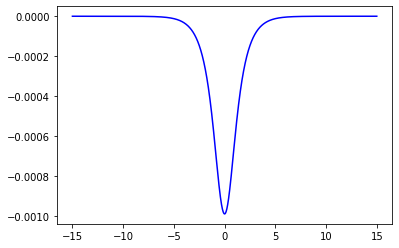

In [16]:
integralequationsplotting.xarrayrayplots(xar, part="real", rayid=0, tcutoff=15)

To make similar computations for opers we just add the keyword `oper=True` in various places. Here is a computation in the (A1,A2) example again. In this case we do not have to specify a parameter R, nor do we have to specify h at the time we run the iterative computation of the X-functions; we only have to specify h later, when we want to evaluate.

In [17]:
xaroper = integralequations.computeXar("A1A2", oper = True)

[06-29 13:08] [MainProcess] [integralequations] [INFO] Starting to compute xars for theory A1A2, oper, tolerance = 2.000E-15, steps = 131072, maxiter = 1000, L = 200, damping = 0.3
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 1, maxdelta = 4.852E-01 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 2, maxdelta = 1.986E-02 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 3, maxdelta = 3.199E-03 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 4, maxdelta = 6.124E-04 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 5, maxdelta = 1.304E-04 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 6, maxdelta = 2.975E-05 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 7, maxdelta = 7.115E-06 (0.5 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 8, maxdelta = 1.761E-06 (0.5 s)
[06

In [18]:
xaroper.computeX(charge = [1,0], h=1)

(-0.011803044221476969-0.07098274998614258j)

In [19]:
xaroper.computeX(charge = [0,1], h=1)

(0.9461894367032756+0.3236132720874376j)

[<Figure size 432x288 with 1 Axes>]

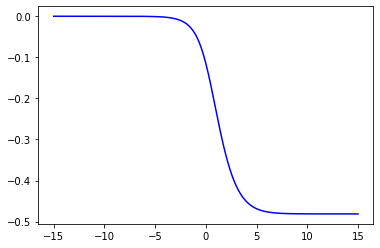

In [20]:
integralequationsplotting.xarrayrayplots(xaroper, part="real", rayid=0, tcutoff=15)

A few computations in the (A1,A3) example. For fun we choose a smaller R this time; one consequence is that we will see a plateau-like structure in the plotted X function.

In [21]:
xar2 = integralequations.computeXar("A1A3", R = 1e-5)

[06-29 13:08] [MainProcess] [integralequations] [INFO] Starting to compute xars for theory A1A3, R = 1.000E-05, tolerance = 2.000E-15, steps = 131072, maxiter = 1000, L = 200, damping = 0.3
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 1, maxdelta = 1.455E+00 (2.3 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 2, maxdelta = 4.218E-01 (2.0 s)
[06-29 13:08] [MainProcess] [integralequations] [INFO] IEQ: iteration 3, maxdelta = 7.130E-02 (2.1 s)
[06-29 13:09] [MainProcess] [integralequations] [INFO] IEQ: iteration 4, maxdelta = 1.003E-02 (2.0 s)
[06-29 13:09] [MainProcess] [integralequations] [INFO] IEQ: iteration 5, maxdelta = 3.364E-03 (2.2 s)
[06-29 13:09] [MainProcess] [integralequations] [INFO] IEQ: iteration 6, maxdelta = 5.102E-04 (2.2 s)
[06-29 13:09] [MainProcess] [integralequations] [INFO] IEQ: iteration 7, maxdelta = 2.305E-04 (2.2 s)
[06-29 13:09] [MainProcess] [integralequations] [INFO] IEQ: iteration 8, maxdelta = 4.750E-05 (2

The plateau value in this case for X1 is just 3, as opposed to the golden ratio which we get in the (A1,A2) case (see the arXiv paper for discussion of that case).

In [22]:
xar2.computeX(charge = [1,0,0], zeta = 1)

(-3.0000039467699446+2.4568523863474272e-17j)

In [23]:
xar2.raydata[0].charges

[[1, 0, 0]]

[<Figure size 432x288 with 1 Axes>]

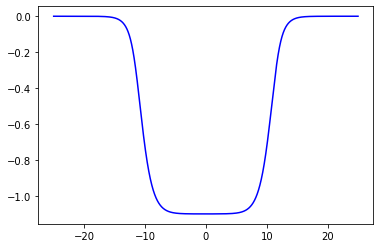

In [24]:
integralequationsplotting.xarrayrayplots(xar2, part="real", rayid=0, tcutoff=25)

# Some quick ODE/PDE computations

In [25]:
logconfig.loglevel(logging.INFO)

DE computation of the subdominant sections for the (A1,A2) example at R=1.

In [26]:
fd = framedata.computeFrames("A1A2", R = 1)

[06-29 13:10] [MainProcess] [framedata] [INFO] Starting to compute frames for theory A1A2, R = 1.000E+00, theta = 0.000E+00, pde_nmesh = 511
[06-29 13:10] [MainProcess] [framedata] [INFO] Raw coefs: [[-1, 0, 0, 1]]
[06-29 13:10] [MainProcess] [framedata] [INFO] Rescaled coefs: [[(-1+0j), 0j, 0j, (1+0j)]]
[06-29 13:10] [MainProcess] [framedata] [INFO] Monicized coefs: [[(-1+0j), 0j, 0j, (1+0j)]]
[06-29 13:10] [MainProcess] [framedata] [INFO] Using rmax: 2.535
[06-29 13:10] [MainProcess] [framedata] [INFO] Error model prediction: 2.57885e-05
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] Computing Laplacian of initial guess and its transform
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] Solving PDE: 511x511 grid, thresh=1e-09
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=1 L2error=0.0761667 L2delta=0	(0.08s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=2 L2error=0.0601749 L2delta=0.000165911	(0.12s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: ite

[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=70 L2error=0.000297599 L2delta=8.20429e-07	(0.13s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=71 L2error=0.000279611 L2delta=7.70817e-07	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=72 L2error=0.000262801 L2delta=7.24456e-07	(0.12s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=73 L2error=0.000247085 L2delta=6.81116e-07	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=74 L2error=0.000232387 L2delta=6.40584e-07	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=75 L2error=0.000218636 L2delta=6.02664e-07	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=76 L2error=0.000205764 L2delta=5.67173e-07	(0.13s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=77 L2error=0.000193712 L2delta=5.33943e-07	(0.13s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=78 L2error=0.000182423 L2delta=5.02817e-07	(0.13s)
[06-29 13:

[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=145 L2error=4.77582e-06 L2delta=1.31666e-08	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=146 L2error=4.53345e-06 L2delta=1.24984e-08	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=147 L2error=4.30345e-06 L2delta=1.18644e-08	(0.10s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=148 L2error=4.08518e-06 L2delta=1.12627e-08	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=149 L2error=3.87804e-06 L2delta=1.06916e-08	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=150 L2error=3.68145e-06 L2delta=1.01497e-08	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=151 L2error=3.49487e-06 L2delta=9.63533e-09	(0.10s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=152 L2error=3.31778e-06 L2delta=9.14715e-09	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=153 L2error=3.14971e-06 L2delta=8.6838e-09	(0.12s)
[0

[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=219 L2error=1.02932e-07 L2delta=2.83824e-10	(0.10s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=220 L2error=9.7738e-08 L2delta=2.69501e-10	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=221 L2error=9.28057e-08 L2delta=2.55901e-10	(0.10s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=222 L2error=8.81224e-08 L2delta=2.42987e-10	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=223 L2error=8.36754e-08 L2delta=2.30725e-10	(0.10s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=224 L2error=7.94528e-08 L2delta=2.19082e-10	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=225 L2error=7.54433e-08 L2delta=2.08027e-10	(0.12s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=226 L2error=7.16362e-08 L2delta=1.97529e-10	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=227 L2error=6.80213e-08 L2delta=1.87561e-10	(0.10s)
[0

[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=294 L2error=2.11852e-09 L2delta=5.8417e-12	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=295 L2error=2.01162e-09 L2delta=5.54693e-12	(0.10s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=296 L2error=1.91011e-09 L2delta=5.26704e-12	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=297 L2error=1.81373e-09 L2delta=5.00127e-12	(0.10s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=298 L2error=1.72221e-09 L2delta=4.74891e-12	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=299 L2error=1.63531e-09 L2delta=4.50929e-12	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=300 L2error=1.55279e-09 L2delta=4.28175e-12	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=301 L2error=1.47444e-09 L2delta=4.0657e-12	(0.11s)
[06-29 13:10] [MainProcess] [nlp_fourier] [INFO] PDE: iter=302 L2error=1.40004e-09 L2delta=3.86055e-12	(0.11s)
[06

Compute determinantal invariants from the subdominant sections.

In [27]:
fd.getCluster()

[-0.00641668711064795, -1.0000000000000016]

DE computation of the subdominant sections for the (A1,A2) example in the oper case, with hbar = 1.

In [28]:
fdoper = framedata.computeFrames("A1A2", oper = True, absh = 1)

[06-29 13:11] [MainProcess] [framedata] [INFO] Starting to compute frames for theory A1A2, oper, abs(h) = 1.00000000E+00, theta = 0.000E+00
[06-29 13:11] [MainProcess] [framedata] [INFO] Raw coefs: [[-1, 0, 0, 1]]
[06-29 13:11] [MainProcess] [framedata] [INFO] Rescaled coefs: [[(-1+0j), 0j, 0j, (1+0j)]]
[06-29 13:11] [MainProcess] [framedata] [INFO] Monicized coefs: [[(-1+0j), 0j, 0j, (1+0j)]]
[06-29 13:11] [MainProcess] [framedata] [INFO] Root enclosing radius: 1
[06-29 13:11] [MainProcess] [framedata] [INFO] Using rmax: 8
[06-29 13:11] [MainProcess] [framedata] [INFO] Solving ODE with initial angle = 0.2000*pi, r = 8.00
[06-29 13:11] [MainProcess] [planarode] [INFO] Calling integrator at angle 0.2000*pi, r = 8.00
[06-29 13:11] [MainProcess] [planarode] [INFO] Calling integrator at angle 0.6000*pi, r = 8.00
[06-29 13:11] [MainProcess] [planarode] [INFO] Calling integrator at angle 1.0000*pi, r = 8.00
[06-29 13:11] [MainProcess] [planarode] [INFO] Calling integrator at angle 1.4000*pi,

Again compute determinantal invariants from the subdominant sections.

In [29]:
fdoper.getCluster()

[(-0.011803044221480503-0.07098274998614351j),
 (0.9461894367032608+0.3236132720874804j)]

# Comparing IEQ and DE computations

Perform both the IEQ and DE computations in the (A1,A2) example, with the parameter Lambda = 0.2, at R = 0.07, and compare the results. (The parameter `scratch=True` tells `compareClusters()` not to look for saved data files but rather to compute both sides directly.)

In [30]:
comparisons.compareClusters("A1A2_Lambda=0.2", R = 0.07, scratch = True, pde_nmesh = 511)

[06-29 13:11] [MainProcess] [theorydata] [INFO] Computed turning points: [(1.0665744498072833+0j), (-0.533287224903211+0.8081991046377994j), (-0.5332872249032111-0.8081991046377994j)]
[06-29 13:11] [MainProcess] [theorydata] [INFO] Computed base sheets: [(1+0j), (-1-0j)]
[06-29 13:11] [MainProcess] [theorydata] [INFO] Computed central charges: [(-2.782474924933036+1.3077381900528278j), (-8.326672684688674e-17-2.6154763801050676j)]
[06-29 13:11] [MainProcess] [integralequations] [INFO] Starting to compute xars for theory A1A2_Lambda=0.2, R = 7.000E-02, tolerance = 2.000E-15, steps = 131072, maxiter = 1000, L = 200, damping = 0.3
[06-29 13:11] [MainProcess] [integralequations] [INFO] IEQ: iteration 1, maxdelta = 2.761E-01 (0.5 s)
[06-29 13:11] [MainProcess] [integralequations] [INFO] IEQ: iteration 2, maxdelta = 3.354E-02 (0.5 s)
[06-29 13:11] [MainProcess] [integralequations] [INFO] IEQ: iteration 3, maxdelta = 4.614E-03 (0.5 s)
[06-29 13:11] [MainProcess] [integralequations] [INFO] IEQ

[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=25 L2error=0.0188837 L2delta=4.92003e-05	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=26 L2error=0.0182691 L2delta=4.75919e-05	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=27 L2error=0.0176849 L2delta=4.60646e-05	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=28 L2error=0.0171288 L2delta=4.46117e-05	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=29 L2error=0.0165986 L2delta=4.32275e-05	(0.14s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=30 L2error=0.0160923 L2delta=4.19066e-05	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=31 L2error=0.0156083 L2delta=4.06443e-05	(0.13s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=32 L2error=0.0151449 L2delta=3.94364e-05	(0.14s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=33 L2error=0.0147007 L2delta=3.82791e-05	(0.12s)
[06-29 13:12] [MainProcess] 

[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=101 L2error=0.00256938 L2delta=6.7012e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=102 L2error=0.00250739 L2delta=6.53955e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=103 L2error=0.00244692 L2delta=6.38186e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=104 L2error=0.00238793 L2delta=6.22803e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=105 L2error=0.00233038 L2delta=6.07797e-06	(0.13s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=106 L2error=0.00227424 L2delta=5.93158e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=107 L2error=0.00221948 L2delta=5.78877e-06	(0.18s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=108 L2error=0.00216606 L2delta=5.64944e-06	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=109 L2error=0.00211393 L2delta=5.51352e-06	(0.14s)
[06-29 13:1

[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=176 L2error=0.000418279 L2delta=1.09096e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=177 L2error=0.000408326 L2delta=1.065e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=178 L2error=0.00039861 L2delta=1.03966e-06	(0.13s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=179 L2error=0.000389127 L2delta=1.01493e-06	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=180 L2error=0.000379869 L2delta=9.90779e-07	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=181 L2error=0.000370832 L2delta=9.67209e-07	(0.13s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=182 L2error=0.000362011 L2delta=9.44201e-07	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=183 L2error=0.0003534 L2delta=9.21741e-07	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=184 L2error=0.000344994 L2delta=8.99817e-07	(0.11s)
[06-29

[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=251 L2error=6.88879e-05 L2delta=1.79671e-07	(0.13s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=252 L2error=6.72522e-05 L2delta=1.75405e-07	(0.14s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=253 L2error=6.56555e-05 L2delta=1.7124e-07	(0.14s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=254 L2error=6.40966e-05 L2delta=1.67174e-07	(0.13s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=255 L2error=6.25748e-05 L2delta=1.63205e-07	(0.21s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=256 L2error=6.10891e-05 L2delta=1.5933e-07	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=257 L2error=5.96387e-05 L2delta=1.55547e-07	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=258 L2error=5.82228e-05 L2delta=1.51854e-07	(0.17s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=259 L2error=5.68405e-05 L2delta=1.48249e-07	(0.11s)
[06

[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=325 L2error=1.16428e-05 L2delta=3.03662e-08	(0.19s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=326 L2error=1.13665e-05 L2delta=2.96454e-08	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=327 L2error=1.10967e-05 L2delta=2.89418e-08	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=328 L2error=1.08333e-05 L2delta=2.82549e-08	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=329 L2error=1.05762e-05 L2delta=2.75842e-08	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=330 L2error=1.03252e-05 L2delta=2.69295e-08	(0.12s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=331 L2error=1.00801e-05 L2delta=2.62904e-08	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=332 L2error=9.84085e-06 L2delta=2.56664e-08	(0.11s)
[06-29 13:12] [MainProcess] [nlp_fourier] [INFO] PDE: iter=333 L2error=9.60729e-06 L2delta=2.50572e-08	(0.11s)
[

[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=399 L2error=1.96836e-06 L2delta=5.13376e-09	(0.14s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=400 L2error=1.92164e-06 L2delta=5.01192e-09	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=401 L2error=1.87604e-06 L2delta=4.89297e-09	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=402 L2error=1.83151e-06 L2delta=4.77685e-09	(0.14s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=403 L2error=1.78804e-06 L2delta=4.66347e-09	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=404 L2error=1.74561e-06 L2delta=4.55279e-09	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=405 L2error=1.70418e-06 L2delta=4.44474e-09	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=406 L2error=1.66373e-06 L2delta=4.33925e-09	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=407 L2error=1.62425e-06 L2delta=4.23627e-09	(0.13s)
[

[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=473 L2error=3.32792e-07 L2delta=8.67969e-10	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=474 L2error=3.24894e-07 L2delta=8.47369e-10	(0.15s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=475 L2error=3.17183e-07 L2delta=8.27259e-10	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=476 L2error=3.09655e-07 L2delta=8.07625e-10	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=477 L2error=3.02306e-07 L2delta=7.88458e-10	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=478 L2error=2.95131e-07 L2delta=7.69745e-10	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=479 L2error=2.88127e-07 L2delta=7.51477e-10	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=480 L2error=2.81289e-07 L2delta=7.33642e-10	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=481 L2error=2.74613e-07 L2delta=7.1623e-10	(0.11s)
[0

[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=547 L2error=5.62658e-08 L2delta=1.46749e-10	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=548 L2error=5.49305e-08 L2delta=1.43267e-10	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=549 L2error=5.36268e-08 L2delta=1.39866e-10	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=550 L2error=5.23541e-08 L2delta=1.36547e-10	(0.13s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=551 L2error=5.11116e-08 L2delta=1.33306e-10	(0.15s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=552 L2error=4.98985e-08 L2delta=1.30143e-10	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=553 L2error=4.87143e-08 L2delta=1.27054e-10	(0.13s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=554 L2error=4.75581e-08 L2delta=1.24038e-10	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=555 L2error=4.64294e-08 L2delta=1.21095e-10	(0.17s)
[

[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=621 L2error=9.51301e-09 L2delta=2.48113e-11	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=622 L2error=9.28723e-09 L2delta=2.42224e-11	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=623 L2error=9.06682e-09 L2delta=2.36476e-11	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=624 L2error=8.85163e-09 L2delta=2.30863e-11	(0.12s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=625 L2error=8.64156e-09 L2delta=2.25384e-11	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=626 L2error=8.43646e-09 L2delta=2.20035e-11	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=627 L2error=8.23624e-09 L2delta=2.14813e-11	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=628 L2error=8.04077e-09 L2delta=2.09715e-11	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=629 L2error=7.84994e-09 L2delta=2.04738e-11	(0.12s)
[

[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=695 L2error=1.60839e-09 L2delta=4.19491e-12	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=696 L2error=1.57022e-09 L2delta=4.09535e-12	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=697 L2error=1.53295e-09 L2delta=3.99815e-12	(0.13s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=698 L2error=1.49657e-09 L2delta=3.90326e-12	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=699 L2error=1.46105e-09 L2delta=3.81063e-12	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=700 L2error=1.42637e-09 L2delta=3.72019e-12	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=701 L2error=1.39252e-09 L2delta=3.6319e-12	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=702 L2error=1.35947e-09 L2delta=3.5457e-12	(0.11s)
[06-29 13:13] [MainProcess] [nlp_fourier] [INFO] PDE: iter=703 L2error=1.32721e-09 L2delta=3.46155e-12	(0.11s)
[06

{'xarcluster': [-0.4879442199968296, -1.0000000000000169],
 'fdcluster': [-0.4879478785412128, -0.9999999999999993],
 'sfcluster': [-0.6773639965424677, -1.0],
 'absdiff': [3.6585443832226616e-06, 1.7541523789077473e-14],
 'logdiff': [-7.497846101545136e-06, 1.754152378907733e-14],
 'phasediff': [0.0, 0.0],
 'reldiff': [7.497846101435657e-06, 1.7541523789077334e-14],
 'frames': <framedata.framedata at 0x7f2235c726a0>,
 'errest': {'absode': [2.59228219666125e-14, 6.625242116455142e-14],
  'relode': [5.3128026096763817e-14, 6.628031457012408e-14]}}

In the output above, `xarcluster` is the IEQ result, `fdcluster` is the DE result, `reldiff` is the relative difference. The relative error in X1 is about 7e-6, which we believe is mostly due to PDE discretization error; in particular, if we pass a larger `pde_nmesh` to compareClusters, the error would likely decrease.

For sufficiently large Lambda the agreement will break down; in particular this would be expected to happen if one of the periods crosses the real axis (or more generally if the phase of one the periods crosses theta), because then the formulas for the spectral coordinates as determinantal invariants would change.

The IEQ side of the above computation uses period integrals which are computed numerically. The commands below compute just the periods.

In [31]:
import theory
t = theory.theory("A1A2_Lambda=0.2")

[06-29 13:14] [MainProcess] [theorydata] [INFO] Computed turning points: [(1.0665744498072833+0j), (-0.533287224903211+0.8081991046377994j), (-0.5332872249032111-0.8081991046377994j)]
[06-29 13:14] [MainProcess] [theorydata] [INFO] Computed base sheets: [(1+0j), (-1-0j)]
[06-29 13:14] [MainProcess] [theorydata] [INFO] Computed central charges: [(-2.782474924933036+1.3077381900528278j), (-8.326672684688674e-17-2.6154763801050676j)]


In [32]:
t.Z(charge = [1,0])

(-2.782474924933036+1.3077381900528278j)

In [33]:
t.Z(charge = [0,1])

(-8.326672684688674e-17-2.6154763801050676j)

Perform both the IEQ and DE computations in the (A2,A1) example, oper case, with the parameter c = 0.3 + 0.2i, at hbar = 1. (This example is interesting because it involves both the quadratic and cubic differentials nonzero. Again, we expect it to work only for small enough c.)

In [34]:
comparisons.compareClusters("A2A1_c=0.3+0.2j", oper = True, scratch = True)

[06-29 13:14] [MainProcess] [theorydata] [INFO] Computed turning points: [(-0.9351698533646766-0.05663731973783919j), (-1.0635531132139227+0.049800534957899774j), (0.9351698533646765+0.05663731973783921j), (1.0635531132139227-0.049800534957899774j)]
[06-29 13:14] [MainProcess] [theorydata] [INFO] Computed base sheets: [(0.6671270942516809-0.0819333637460608j), (-0.2594735981067419-0.7554304761970746j), (-0.40765349614181556+0.8373638399459366j)]
[06-29 13:14] [MainProcess] [theorydata] [INFO] Computed central charges: [(-1.7040764484066964+1.7617838284959906j), (0.38002303726471043-2.8767473026309123j)]
[06-29 13:14] [MainProcess] [integralequations] [INFO] Starting to compute xars for theory A2A1_c=0.3+0.2j, oper, tolerance = 2.000E-15, steps = 131072, maxiter = 1000, L = 200, damping = 0.3
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 1, maxdelta = 4.852E-01 (0.5 s)
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 2, maxdelta = 2.320E-02 (

{'xarcluster': [(0.023012056979117845-0.1555407756203862j),
  (1.4046165602131329+0.5172239430842291j)],
 'fdcluster': [(0.023012056980545932-0.15554077562340288j),
  (1.404616560193209+0.5172239430977805j)],
 'sfcluster': [(0.03453746792315948-0.17863216561243592j),
  (1.4113316157868863+0.38277645319101644j)],
 'absdiff': [3.3376236053912887e-12, 2.409562979214613e-11],
 'logdiff': [-2.0308643655653214e-11, 9.362344233210251e-12],
 'phasediff': [-6.176836819804521e-12, -1.3095302620058646e-11],
 'reldiff': [2.12271297256958e-11, 1.609788725424575e-11],
 'frames': <framedata.framedata at 0x7f221c357390>,
 'errest': {'absode': [2.7193163533116805e-13, 3.661643446019994e-12],
  'relode': [1.729407198047231e-12, 2.4463456329378577e-12]}}

In [35]:
comparisons.compareClusters("A1A3", scratch = True)

[06-29 13:14] [MainProcess] [integralequations] [INFO] Starting to compute xars for theory A1A3, R = 1.000E+00, tolerance = 2.000E-15, steps = 131072, maxiter = 1000, L = 200, damping = 0.3
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 1, maxdelta = 4.282E-03 (2.1 s)
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 2, maxdelta = 1.277E-03 (2.1 s)
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 3, maxdelta = 3.807E-04 (1.9 s)
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 4, maxdelta = 1.135E-04 (2.1 s)
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 5, maxdelta = 3.384E-05 (2.1 s)
[06-29 13:14] [MainProcess] [integralequations] [INFO] IEQ: iteration 6, maxdelta = 1.009E-05 (2.1 s)
[06-29 13:15] [MainProcess] [integralequations] [INFO] IEQ: iteration 7, maxdelta = 3.009E-06 (2.1 s)
[06-29 13:15] [MainProcess] [integralequations] [INFO] IEQ: iteration 8, maxdelta = 8.972E-07 (2

[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=40 L2error=0.0245111 L2delta=2.04671e-05	(0.11s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=41 L2error=0.0238107 L2delta=1.98825e-05	(0.12s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=42 L2error=0.0231332 L2delta=1.9317e-05	(0.12s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=43 L2error=0.0224776 L2delta=1.87698e-05	(0.11s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=44 L2error=0.0218431 L2delta=1.82401e-05	(0.12s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=45 L2error=0.0212289 L2delta=1.77273e-05	(0.22s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=46 L2error=0.0206342 L2delta=1.72307e-05	(0.15s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=47 L2error=0.0200582 L2delta=1.67498e-05	(0.13s)
[06-29 13:15] [MainProcess] [nlp_fourier] [INFO] PDE: iter=48 L2error=0.0195002 L2delta=1.62838e-05	(0.13s)
[06-29 13:15] [MainProcess] [

[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=116 L2error=0.00338973 L2delta=2.82824e-06	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=117 L2error=0.00331094 L2delta=2.76247e-06	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=118 L2error=0.00323419 L2delta=2.6984e-06	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=119 L2error=0.00315942 L2delta=2.63598e-06	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=120 L2error=0.00308658 L2delta=2.57518e-06	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=121 L2error=0.00301561 L2delta=2.51594e-06	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=122 L2error=0.00294647 L2delta=2.45822e-06	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=123 L2error=0.00287909 L2delta=2.40198e-06	(0.13s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=124 L2error=0.00281344 L2delta=2.34717e-06	(0.11s)
[06-29 13:1

[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=191 L2error=0.000690379 L2delta=5.75535e-07	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=192 L2error=0.000677318 L2delta=5.64641e-07	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=193 L2error=0.000664534 L2delta=5.53978e-07	(0.13s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=194 L2error=0.000652021 L2delta=5.43541e-07	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=195 L2error=0.000639771 L2delta=5.33324e-07	(0.18s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=196 L2error=0.000627778 L2delta=5.23322e-07	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=197 L2error=0.000616037 L2delta=5.13529e-07	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=198 L2error=0.000604541 L2delta=5.03941e-07	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=199 L2error=0.000593284 L2delta=4.94553e-07	(0.11s)
[

[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=265 L2error=0.000183724 L2delta=1.53074e-07	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=266 L2error=0.000180619 L2delta=1.50486e-07	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=267 L2error=0.000177569 L2delta=1.47944e-07	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=268 L2error=0.000174573 L2delta=1.45447e-07	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=269 L2error=0.000171629 L2delta=1.42994e-07	(0.14s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=270 L2error=0.000168738 L2delta=1.40584e-07	(0.13s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=271 L2error=0.000165897 L2delta=1.38216e-07	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=272 L2error=0.000163106 L2delta=1.3589e-07	(0.19s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=273 L2error=0.000160364 L2delta=1.33605e-07	(0.13s)
[0

[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=339 L2error=5.33169e-05 L2delta=4.44103e-08	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=340 L2error=5.24436e-05 L2delta=4.36828e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=341 L2error=5.15848e-05 L2delta=4.29674e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=342 L2error=5.07402e-05 L2delta=4.22637e-08	(0.13s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=343 L2error=4.99096e-05 L2delta=4.15718e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=344 L2error=4.90927e-05 L2delta=4.08913e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=345 L2error=4.82893e-05 L2delta=4.0222e-08	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=346 L2error=4.74992e-05 L2delta=3.95638e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=347 L2error=4.67221e-05 L2delta=3.89165e-08	(0.11s)
[0

[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=413 L2error=1.57888e-05 L2delta=1.31498e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=414 L2error=1.55319e-05 L2delta=1.29358e-08	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=415 L2error=1.52792e-05 L2delta=1.27253e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=416 L2error=1.50306e-05 L2delta=1.25183e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=417 L2error=1.47861e-05 L2delta=1.23147e-08	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=418 L2error=1.45456e-05 L2delta=1.21143e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=419 L2error=1.4309e-05 L2delta=1.19173e-08	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=420 L2error=1.40762e-05 L2delta=1.17234e-08	(0.13s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=421 L2error=1.38473e-05 L2delta=1.15327e-08	(0.11s)
[0

[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=487 L2error=4.69492e-06 L2delta=3.91001e-09	(0.13s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=488 L2error=4.61864e-06 L2delta=3.84648e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=489 L2error=4.5436e-06 L2delta=3.78398e-09	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=490 L2error=4.46978e-06 L2delta=3.7225e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=491 L2error=4.39716e-06 L2delta=3.66202e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=492 L2error=4.32572e-06 L2delta=3.60252e-09	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=493 L2error=4.25544e-06 L2delta=3.54399e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=494 L2error=4.1863e-06 L2delta=3.48641e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=495 L2error=4.11828e-06 L2delta=3.42976e-09	(0.13s)
[06-

[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=561 L2error=1.39722e-06 L2delta=1.1636e-09	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=562 L2error=1.37452e-06 L2delta=1.1447e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=563 L2error=1.3522e-06 L2delta=1.12611e-09	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=564 L2error=1.33023e-06 L2delta=1.10782e-09	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=565 L2error=1.30863e-06 L2delta=1.08982e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=566 L2error=1.28737e-06 L2delta=1.07212e-09	(0.11s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=567 L2error=1.26646e-06 L2delta=1.0547e-09	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=568 L2error=1.24589e-06 L2delta=1.03757e-09	(0.12s)
[06-29 13:16] [MainProcess] [nlp_fourier] [INFO] PDE: iter=569 L2error=1.22565e-06 L2delta=1.02072e-09	(0.11s)
[06-2

[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=635 L2error=4.15882e-07 L2delta=3.46343e-10	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=636 L2error=4.09127e-07 L2delta=3.40717e-10	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=637 L2error=4.02482e-07 L2delta=3.35183e-10	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=638 L2error=3.95944e-07 L2delta=3.29739e-10	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=639 L2error=3.89513e-07 L2delta=3.24383e-10	(0.13s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=640 L2error=3.83186e-07 L2delta=3.19114e-10	(0.14s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=641 L2error=3.76963e-07 L2delta=3.13931e-10	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=642 L2error=3.7084e-07 L2delta=3.08832e-10	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=643 L2error=3.64816e-07 L2delta=3.03816e-10	(0.12s)
[0

[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=709 L2error=1.23791e-07 L2delta=1.03091e-10	(0.15s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=710 L2error=1.2178e-07 L2delta=1.01417e-10	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=711 L2error=1.19802e-07 L2delta=9.97698e-11	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=712 L2error=1.17856e-07 L2delta=9.81493e-11	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=713 L2error=1.15942e-07 L2delta=9.65551e-11	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=714 L2error=1.14059e-07 L2delta=9.49868e-11	(0.14s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=715 L2error=1.12206e-07 L2delta=9.3444e-11	(0.13s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=716 L2error=1.10384e-07 L2delta=9.19262e-11	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=717 L2error=1.08591e-07 L2delta=9.04331e-11	(0.13s)
[06

[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=783 L2error=3.68475e-08 L2delta=3.06862e-11	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=784 L2error=3.62491e-08 L2delta=3.01877e-11	(0.15s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=785 L2error=3.56603e-08 L2delta=2.96974e-11	(0.14s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=786 L2error=3.50811e-08 L2delta=2.92151e-11	(0.13s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=787 L2error=3.45113e-08 L2delta=2.87405e-11	(0.16s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=788 L2error=3.39507e-08 L2delta=2.82737e-11	(0.22s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=789 L2error=3.33993e-08 L2delta=2.78145e-11	(0.23s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=790 L2error=3.28568e-08 L2delta=2.73627e-11	(0.13s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=791 L2error=3.23231e-08 L2delta=2.69183e-11	(0.11s)
[

[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=857 L2error=1.09681e-08 L2delta=9.13404e-12	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=858 L2error=1.07899e-08 L2delta=8.98568e-12	(0.14s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=859 L2error=1.06147e-08 L2delta=8.83973e-12	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=860 L2error=1.04422e-08 L2delta=8.69616e-12	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=861 L2error=1.02726e-08 L2delta=8.55491e-12	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=862 L2error=1.01058e-08 L2delta=8.41596e-12	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=863 L2error=9.94164e-09 L2delta=8.27926e-12	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=864 L2error=9.78017e-09 L2delta=8.14479e-12	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=865 L2error=9.62131e-09 L2delta=8.0125e-12	(0.11s)
[0

[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=931 L2error=3.26475e-09 L2delta=2.71884e-12	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=932 L2error=3.21173e-09 L2delta=2.67468e-12	(0.13s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=933 L2error=3.15956e-09 L2delta=2.63124e-12	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=934 L2error=3.10824e-09 L2delta=2.5885e-12	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=935 L2error=3.05776e-09 L2delta=2.54646e-12	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=936 L2error=3.00809e-09 L2delta=2.5051e-12	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=937 L2error=2.95923e-09 L2delta=2.46441e-12	(0.12s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=938 L2error=2.91117e-09 L2delta=2.42438e-12	(0.11s)
[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: iter=939 L2error=2.86388e-09 L2delta=2.385e-12	(0.12s)
[06-2

[06-29 13:17] [MainProcess] [nlp_fourier] [INFO] PDE: success	(120.80s total; 120.72s in main loop)
[06-29 13:17] [MainProcess] [extsde] [INFO] Using outside contribution 0.0 to moment map
[06-29 13:17] [MainProcess] [extsde] [INFO] Computed moment map: 1.171384854975706
[06-29 13:17] [MainProcess] [framedata] [INFO] Solving ODE with initial angle = 0.1667*pi, r = 2.48
[06-29 13:17] [MainProcess] [planarode] [INFO] Calling integrator at angle 0.1667*pi, r = 2.48
[06-29 13:17] [MainProcess] [planarode] [INFO] Calling integrator at angle 0.5000*pi, r = 2.48
[06-29 13:17] [MainProcess] [planarode] [INFO] Calling integrator at angle 0.8333*pi, r = 2.48
[06-29 13:18] [MainProcess] [planarode] [INFO] Calling integrator at angle 1.1667*pi, r = 2.48
[06-29 13:18] [MainProcess] [planarode] [INFO] Calling integrator at angle 1.5000*pi, r = 2.48
[06-29 13:18] [MainProcess] [planarode] [INFO] Calling integrator at angle 1.8333*pi, r = 2.48
[06-29 13:18] [MainProcess] [framedata] [INFO] Finished in

{'xarcluster': [-1094.720572070952, -33.101670230836454, -33.101670230836454],
 'fdcluster': [-1094.5517144413916, -33.09911954178521, -33.09911954178533],
 'sfcluster': [-1088.0620729284417, -33.000940485515464, -33.000940485515464],
 'absdiff': [0.16885762956030703,
  0.0025506890512474456,
  0.0025506890511266533],
 'logdiff': [0.0001542591398386861,
  7.705917289735353e-05,
  7.705917289380082e-05],
 'phasediff': [0.0, 0.0, 0.0],
 'reldiff': [0.00015425913953289795,
  7.705917285906222e-05,
  7.705917285541281e-05],
 'frames': <framedata.framedata at 0x7f21f038b320>,
 'errest': {'absode': [4.414717294652786e-11,
   1.3753235820056078e-12,
   1.375323582080636e-12],
  'relode': [4.0300053852183546e-14,
   4.164621072879076e-14,
   4.164621072879061e-14]}}

# Some quick metric computations

In [36]:
hkmetric.comparemetrics(c = 0.5, Lambda = 0, pde_nmesh = 500)

[06-29 13:18] [MainProcess] [hkmetric] [INFO] Starting PDE computation of hyperkahler metric element
[06-29 13:18] [MainProcess] [hkmetric] [INFO] coefs: [-0.5, 0, 0, 1]
[06-29 13:18] [MainProcess] [hkmetric] [INFO] Monicized coefs: [-0.5, 0.0, 0.0, 1.0]
[06-29 13:18] [MainProcess] [discdiff] [INFO] Loading discrete laplacian from grid500.v2.disclaplacian.cache.npz
[06-29 13:18] [MainProcess] [nlp_euler] [INFO] Solving PDE
[06-29 13:18] [MainProcess] [nlp_euler] [INFO] PDE: GOAL=5e-11
[06-29 13:18] [MainProcess] [nlp_euler] [INFO] PDE: iter=1 error=14.9936 delta=0.245836	(22.53s)
[06-29 13:19] [MainProcess] [nlp_euler] [INFO] PDE: iter=2 error=0.319064 delta=0.0209887	(24.43s)
[06-29 13:19] [MainProcess] [nlp_euler] [INFO] PDE: iter=3 error=0.000978626 delta=6.45372e-05	(21.39s)
[06-29 13:19] [MainProcess] [nlp_euler] [INFO] PDE: iter=4 error=8.68972e-09 delta=5.7544e-10	(21.83s)
[06-29 13:20] [MainProcess] [nlp_euler] [INFO] PDE: iter=5 error=1.36424e-11 delta=6.52635e-16	(21.66s)
[06

[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 21, maxdelta = 1.962E-13 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 22, maxdelta = 5.691E-14 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 23, maxdelta = 1.651E-14 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 24, maxdelta = 4.791E-15 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 25, maxdelta = 1.395E-15 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 26, maxdelta = 4.059E-16 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 27, maxdelta = 1.145E-16 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 28, maxdelta = 3.470E-17 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 29, maxdelta = 1.041E-17 (0.1 s)
[06-29 13:20] [MainProcess] [integralequations] [INFO] IEQ: iteration 30,

{'ieq': 25.061199365101636,
 'fd': 25.06046332780916,
 'delta': 0.0007360372924765102,
 'reldiff': 2.9370026967625525e-05}

In [37]:
hkmetric.comparemetrics(c = 0.5, Lambda = 0.5, pde_nmesh = 500)

[06-29 13:20] [MainProcess] [hkmetric] [INFO] Starting PDE computation of hyperkahler metric element
[06-29 13:20] [MainProcess] [hkmetric] [INFO] coefs: [-0.5, -0.5, 0, 1]
[06-29 13:20] [MainProcess] [hkmetric] [INFO] Monicized coefs: [-0.5, -0.5, 0.0, 1.0]
[06-29 13:20] [MainProcess] [discdiff] [INFO] Loading discrete laplacian from grid500.v2.disclaplacian.cache.npz
[06-29 13:20] [MainProcess] [nlp_euler] [INFO] Solving PDE
[06-29 13:20] [MainProcess] [nlp_euler] [INFO] PDE: GOAL=5e-11
[06-29 13:21] [MainProcess] [nlp_euler] [INFO] PDE: iter=1 error=17.9155 delta=0.247435	(20.86s)
[06-29 13:21] [MainProcess] [nlp_euler] [INFO] PDE: iter=2 error=0.361531 delta=0.022183	(22.35s)
[06-29 13:22] [MainProcess] [nlp_euler] [INFO] PDE: iter=3 error=0.00162679 delta=9.20838e-05	(22.45s)
[06-29 13:22] [MainProcess] [nlp_euler] [INFO] PDE: iter=4 error=2.75986e-08 delta=1.51395e-09	(23.55s)
[06-29 13:22] [MainProcess] [nlp_euler] [INFO] PDE: iter=5 error=1.31877e-11 delta=6.36145e-16	(21.93s)


[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 13, maxdelta = 1.123E-08 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 14, maxdelta = 3.326E-09 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 15, maxdelta = 9.865E-10 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 16, maxdelta = 2.928E-10 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 17, maxdelta = 8.697E-11 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 18, maxdelta = 2.585E-11 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 19, maxdelta = 7.692E-12 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 20, maxdelta = 2.290E-12 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 21, maxdelta = 6.825E-13 (0.1 s)
[06-29 13:23] [MainProcess] [integralequations] [INFO] IEQ: iteration 22,

{'ieq': 24.76540097923166,
 'fd': 24.76485717624416,
 'delta': 0.0005438029875008965,
 'reldiff': 2.1958415229490435e-05}

# Looking at stored data

In [38]:
logconfig.loglevel(logging.WARN)

The commands in this section use the stored data files; these files are available as the dataset at [https://doi.org/10.7910/DVN/W0V4D9](https://doi.org/10.7910/DVN/W0V4D9). The code expects them to be installed at paths specified in `paths.conf`. The command below interrogates the code about what paths it is looking in.

In [39]:
(integralequations.fileinfo.XARPATH, integralequations.fileinfo.FRAMEPATH, integralequations.fileinfo.HKMETRICPATH, integralequations.fileinfo.CACHEPATH)

('/home/andy/Nextcloud/hn-data/xars',
 '/home/andy/Nextcloud/hn-data/frames',
 '/home/andy/Nextcloud/hn-data/hk',
 '/home/andy/Nextcloud/hn-data/cache')

A comparison between the two stored clusters in the (A1,A2) example, at R=1 and theta=0.1.
`xarcluster` is the IEQ result, `fdcluster` is the DE result, `reldiff` is the relative difference.

In [40]:
comparisons.compareClusters("A1A2", oper=False, R=1, pde_nmesh=8191, theta = 0.1)

{'xarcluster': [-0.00880077224294364, -0.558911091886089],
 'fdcluster': [-0.008800765040675737, -0.5589112960625175],
 'sfcluster': [-0.008811613280370572, -0.5588326744108815],
 'absdiff': [7.202267901865178e-09, 2.0417642854209106e-07],
 'logdiff': [8.183680533235815e-07, -3.65311038197369e-07],
 'phasediff': [0.0, 0.0],
 'reldiff': [8.183680534049565e-07, 3.6531103821742096e-07],
 'frames': <framedata.framedata at 0x7f21f03164e0>,
 'errest': {'absode': [6.681804864951611e-16, 3.185123954579445e-14],
  'relode': [7.588755468011178e-14, 5.700976350132454e-14]}}

All the clusters computed by IEQ method in the (A1,A2) example. The list of R values is drawn from the `theorydata` module; if the data file for some R were missing, this command would generate an error.

In [41]:
comparisons.xarclustertable("A1A2", theta = 0.1)

[{'R': 1.6052280551856116e-09,
  'xarcluster': [-0.6180339886780735, -0.999999999977683]},
 {'R': 2.335593038799337e-09,
  'xarcluster': [-0.618033988637256, -0.9999999999650002]},
 {'R': 3.398267819495071e-09,
  'xarcluster': [-0.6180339885732413, -0.9999999999451096]},
 {'R': 4.944450501938644e-09,
  'xarcluster': [-0.6180339884728464, -0.9999999999139149]},
 {'R': 7.194133030325383e-09,
  'xarcluster': [-0.6180339883153959, -0.9999999998649918]},
 {'R': 1.0467401794744658e-08,
  'xarcluster': [-0.6180339880684642, -0.9999999997882653]},
 {'R': 1.522997974471263e-08,
  'xarcluster': [-0.6180339876811984, -0.999999999667934]},
 {'R': 2.215948977336598e-08,
  'xarcluster': [-0.6180339870738447, -0.999999999479217]},
 {'R': 3.2241867372567335e-08,
  'xarcluster': [-0.6180339861213243, -0.99999999918325]},
 {'R': 4.691164021834418e-08,
  'xarcluster': [-0.6180339846274752, -0.9999999987190812]},
 {'R': 6.82560337633487e-08,
  'xarcluster': [-0.6180339822846532, -0.9999999979911197]},
 {'

All the clusters computed by DE method in the (A1,A2) example. Since data is stored for several values of `pde_nmesh` we have to specify which we want. (Otherwise the default will be used, which is stored in framedata.PDE_NMESH; when the framedata module is loaded, this is set to 511; we actually don't have data stored for that value, so it would generate an error here.)

In [42]:
comparisons.fdclustertable("A1A2", theta = 0.1, pde_nmesh = 8191)

[{'R': 1.6052280551856116e-09,
  'fdcluster': [-0.6180339886780674, -0.9999999999776963]},
 {'R': 2.335593038799337e-09,
  'fdcluster': [-0.6180339886372574, -0.9999999999650055]},
 {'R': 3.398267819495071e-09,
  'fdcluster': [-0.6180339885732863, -0.9999999999451239]},
 {'R': 4.944450501938644e-09,
  'fdcluster': [-0.6180339884728518, -0.999999999913908]},
 {'R': 7.194133030325383e-09,
  'fdcluster': [-0.6180339883154522, -0.9999999998649931]},
 {'R': 1.0467401794744658e-08,
  'fdcluster': [-0.6180339880684435, -0.999999999788296]},
 {'R': 1.522997974471263e-08,
  'fdcluster': [-0.6180339876812131, -0.9999999996679481]},
 {'R': 2.215948977336598e-08,
  'fdcluster': [-0.6180339870738973, -0.9999999994792026]},
 {'R': 3.2241867372567335e-08,
  'fdcluster': [-0.6180339861213378, -0.9999999991832624]},
 {'R': 4.691164021834418e-08,
  'fdcluster': [-0.6180339846274938, -0.999999998719096]},
 {'R': 6.82560337633487e-08,
  'fdcluster': [-0.6180339822847434, -0.99999999799115]},
 {'R': 9.9311

A quick and dirty comparison table.

In [43]:
print(comparisons.plaintables("A1A2", theta = 0.1, pde_nmesh = 8191, precision=5)["data"])

       R              X1f             X1i          X1logdiff          X2f             X2i          X2logdiff    
 1.60523E-09    -6.18034E-01    -6.18034E-01     9.88098E-15    -1.00000E+00    -1.00000E+00    -1.33227E-14    
 2.33559E-09    -6.18034E-01    -6.18034E-01    -2.33147E-15    -1.00000E+00    -1.00000E+00    -5.32907E-15    
 3.39827E-09    -6.18034E-01    -6.18034E-01    -7.27751E-14    -1.00000E+00    -1.00000E+00    -1.43219E-14    
 4.94445E-09    -6.18034E-01    -6.18034E-01    -8.77076E-15    -1.00000E+00    -1.00000E+00     6.88338E-15    
 7.19413E-09    -6.18034E-01    -6.18034E-01    -9.10938E-14    -1.00000E+00    -1.00000E+00    -1.33227E-15    
 1.04674E-08    -6.18034E-01    -6.18034E-01     3.35842E-14    -1.00000E+00    -1.00000E+00    -3.07532E-14    
 1.52300E-08    -6.18034E-01    -6.18034E-01    -2.37033E-14    -1.00000E+00    -1.00000E+00    -1.40998E-14    
 2.21595E-08    -6.18034E-01    -6.18034E-01    -8.51541E-14    -1.00000E+00    -1.00000E+00    